In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('MachineLearningRating_v3.csv')

# Display the first 5 rows of the data
print(data.head())

C:\Users\herme\AppData\Local\Temp\ipykernel_14260\3822148943.py:7: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('MachineLearningRating_v3.csv')


   UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
0               145249     12827    3/1/2015 0:00             True   
1               145249     12827    5/1/2015 0:00             True   
2               145249     12827    7/1/2015 0:00             True   
3               145255     12827    5/1/2015 0:00             True   
4               145255     12827    7/1/2015 0:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - Windscreen    Windscreen

In [7]:
numerical_cols = ['TotalPremium', 'TotalClaims']
descriptive_stats = data[numerical_cols].describe()
print(descriptive_stats)

       TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05


In [8]:
data_structure = data.dtypes
print(data_structure)

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [9]:
missing_values = data.isnull().sum()
print(missing_values)

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

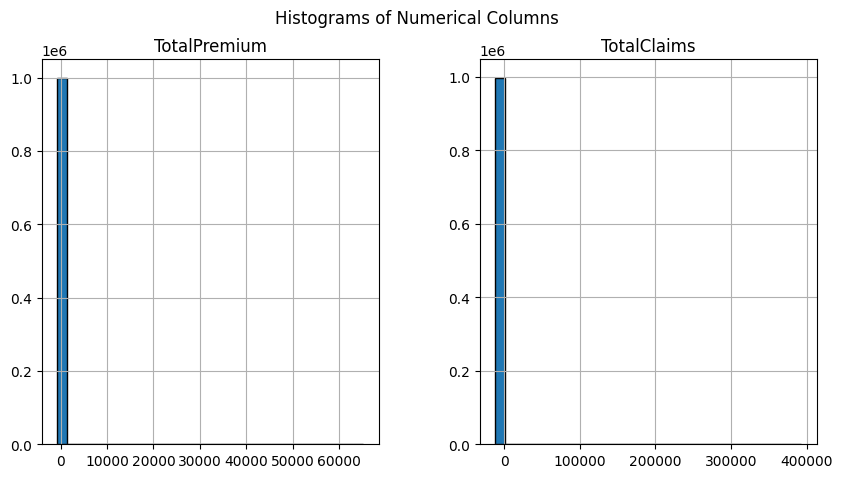

In [10]:
data[numerical_cols].hist(bins=30, figsize=(10, 5), edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')
plt.show()

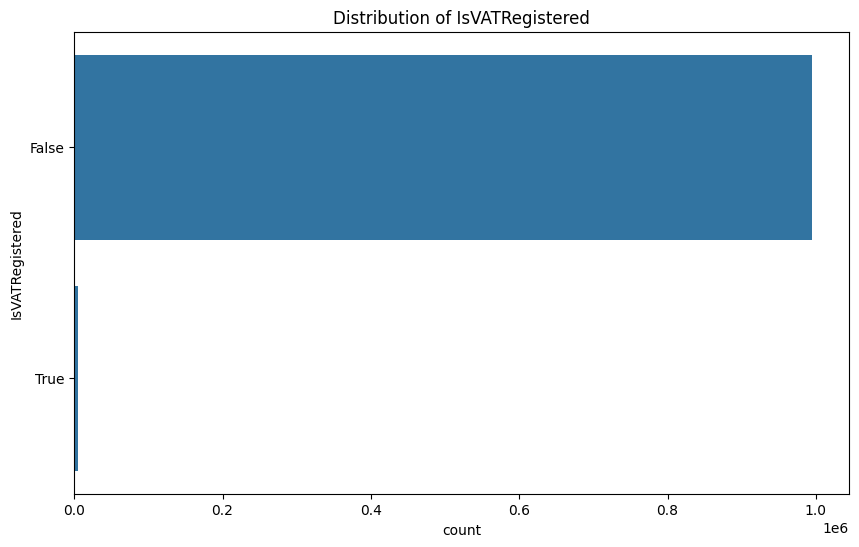

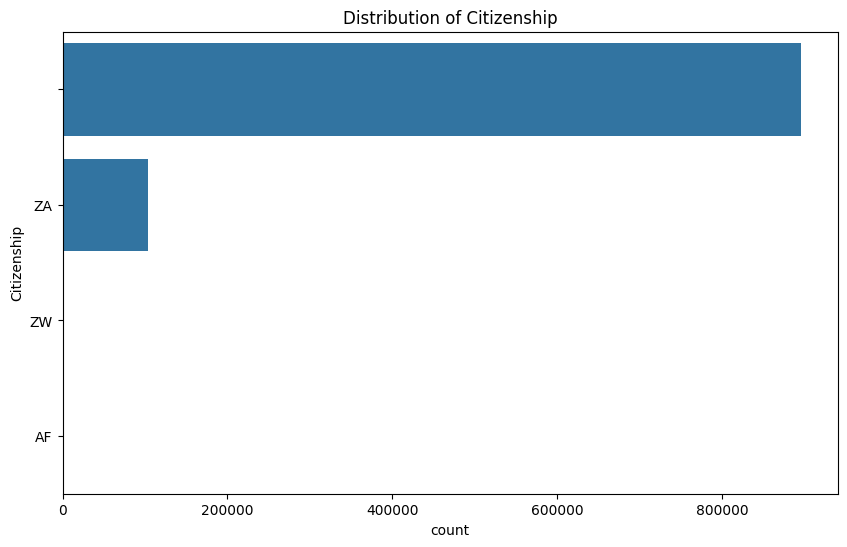

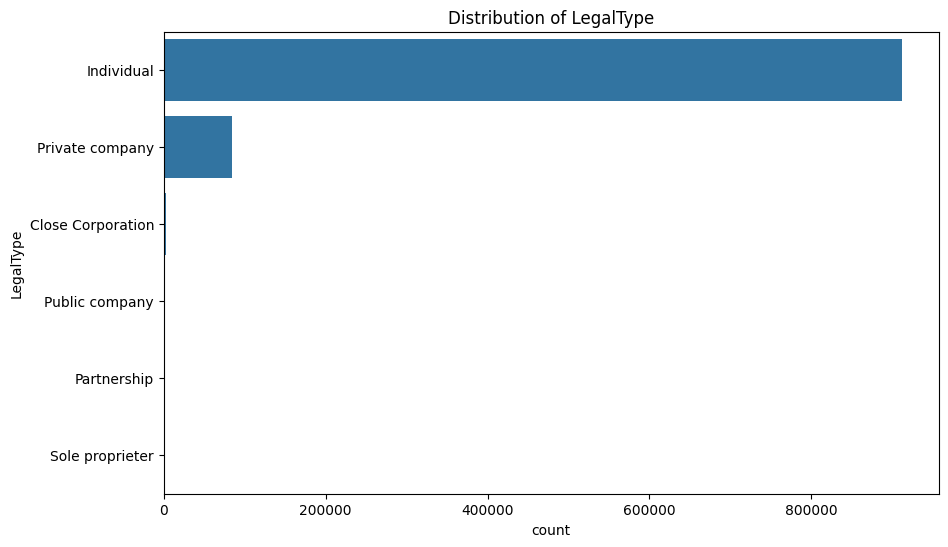

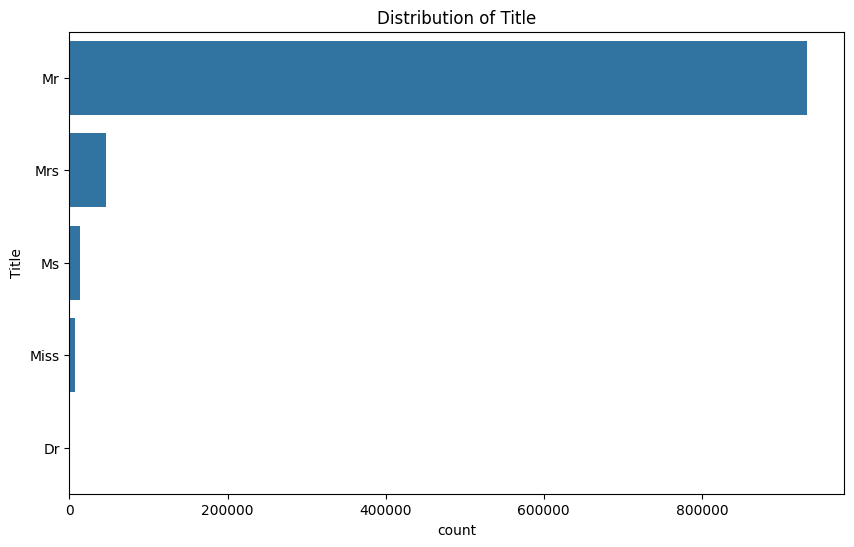

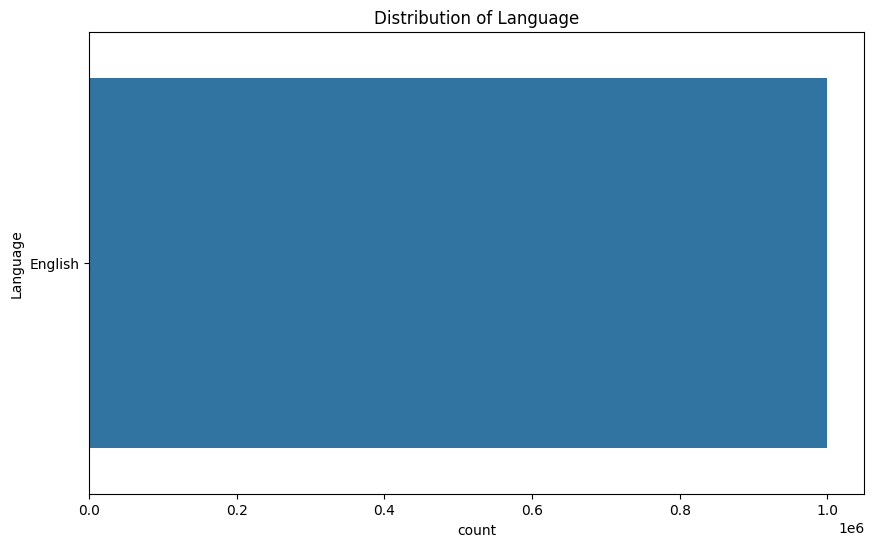

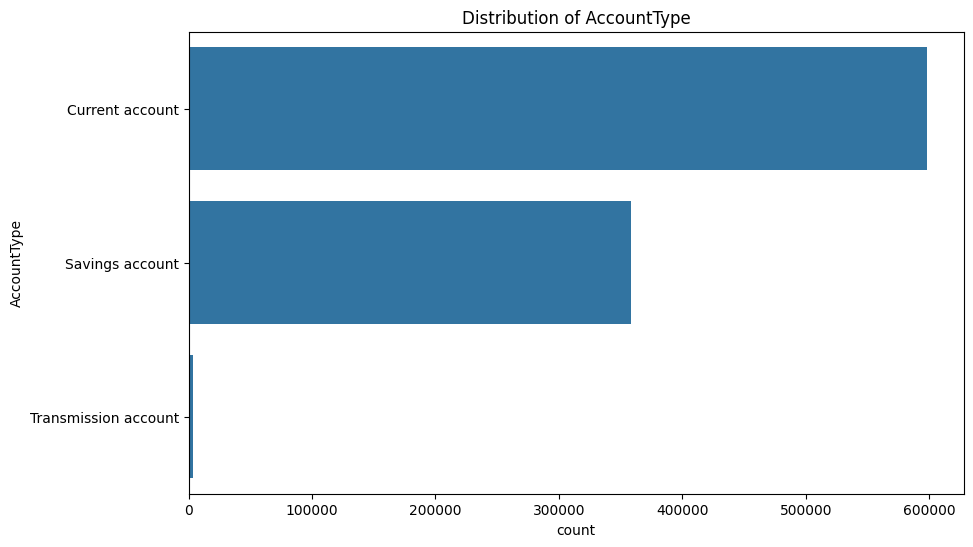

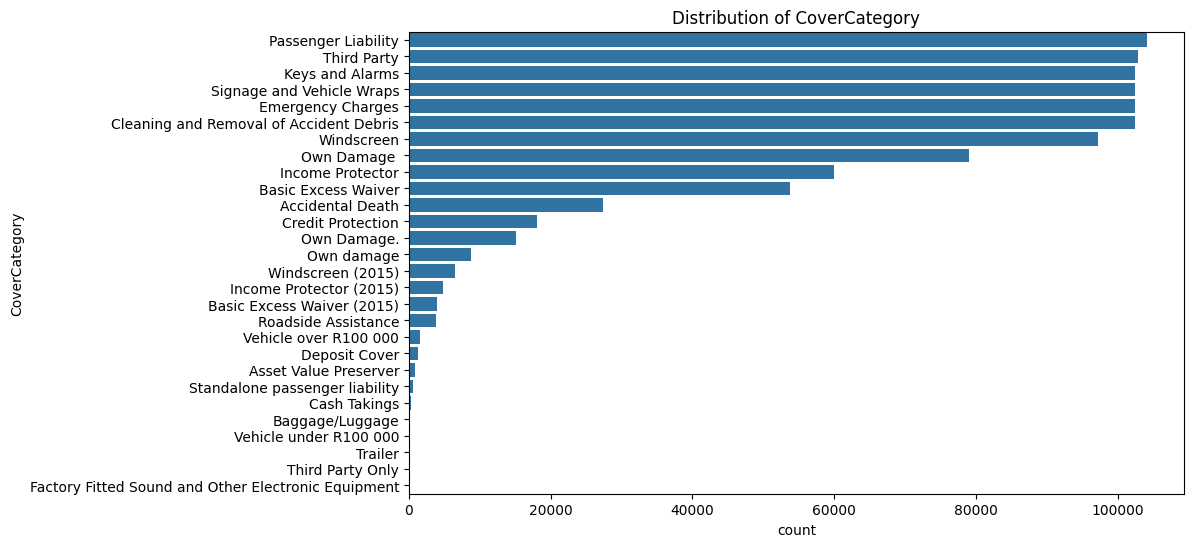

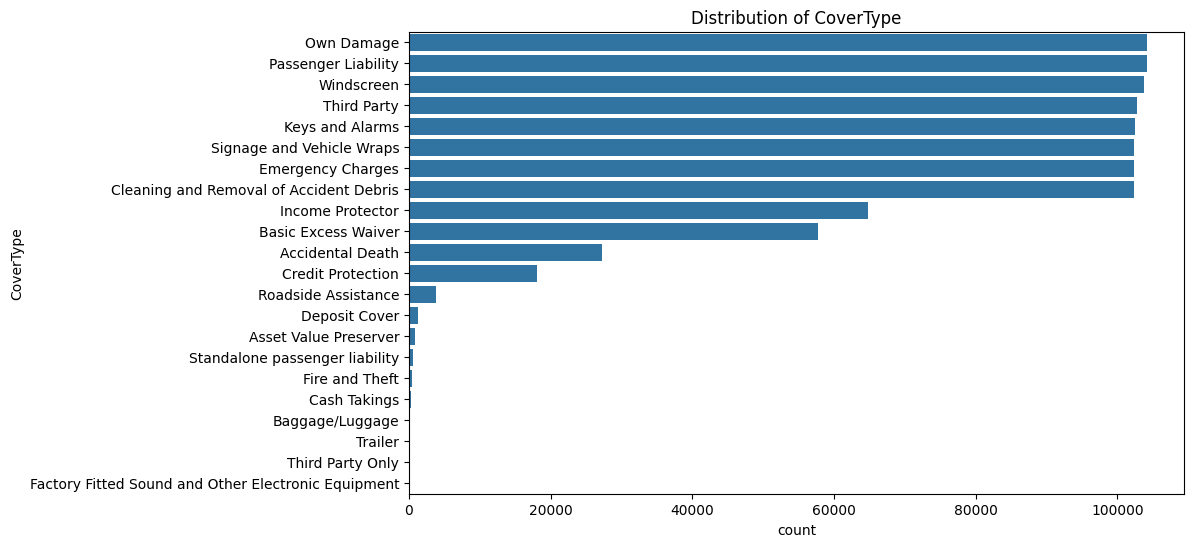

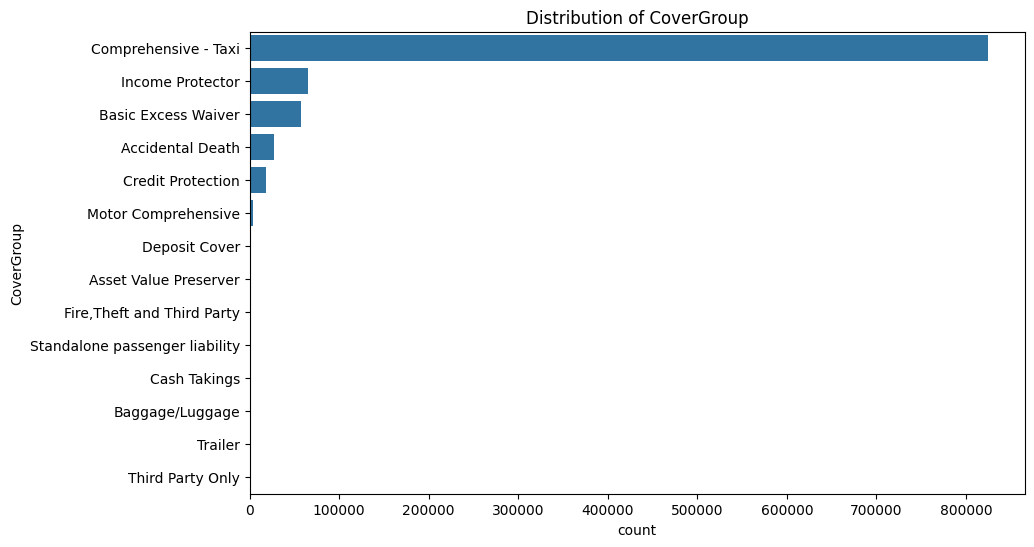

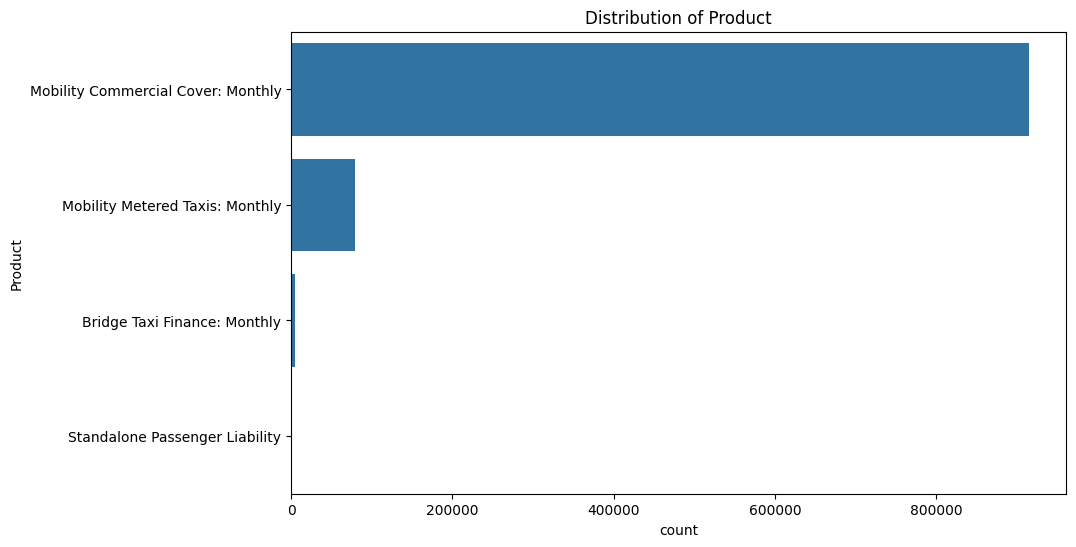

In [11]:
categorical_columns = [
    "IsVATRegistered",
    "Citizenship",
    "LegalType",
    "Title",
    "Language",
    "AccountType",
    "CoverCategory",
    "CoverType",
    "CoverGroup",
    "Product",
]
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=data, order=data[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.show()

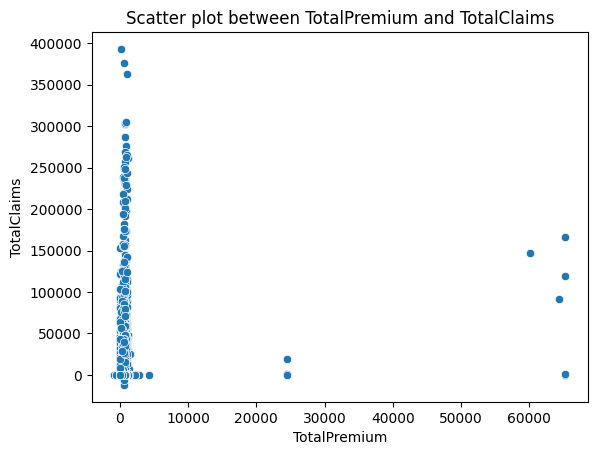

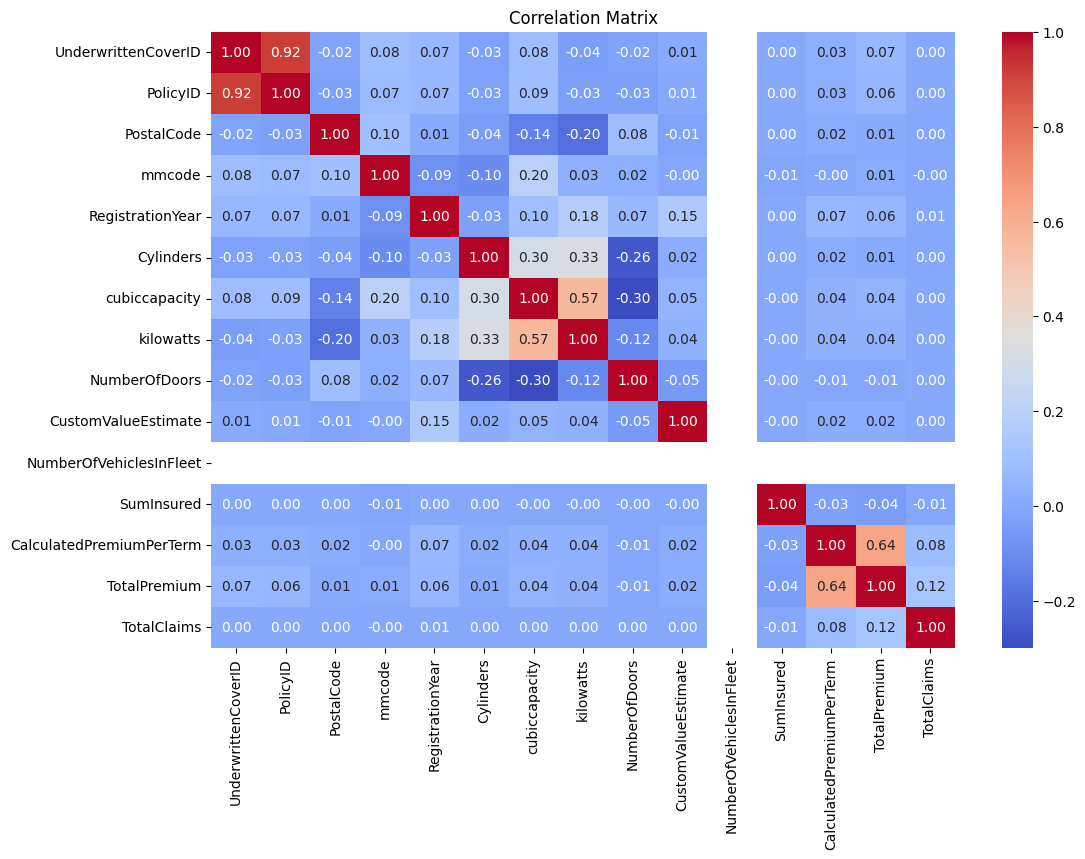

In [12]:
sns.scatterplot(x="TotalPremium", y="TotalClaims", data=data)
plt.title("Scatter plot between TotalPremium and TotalClaims")
plt.show()

# Display correlation matrix for numerical columns only
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

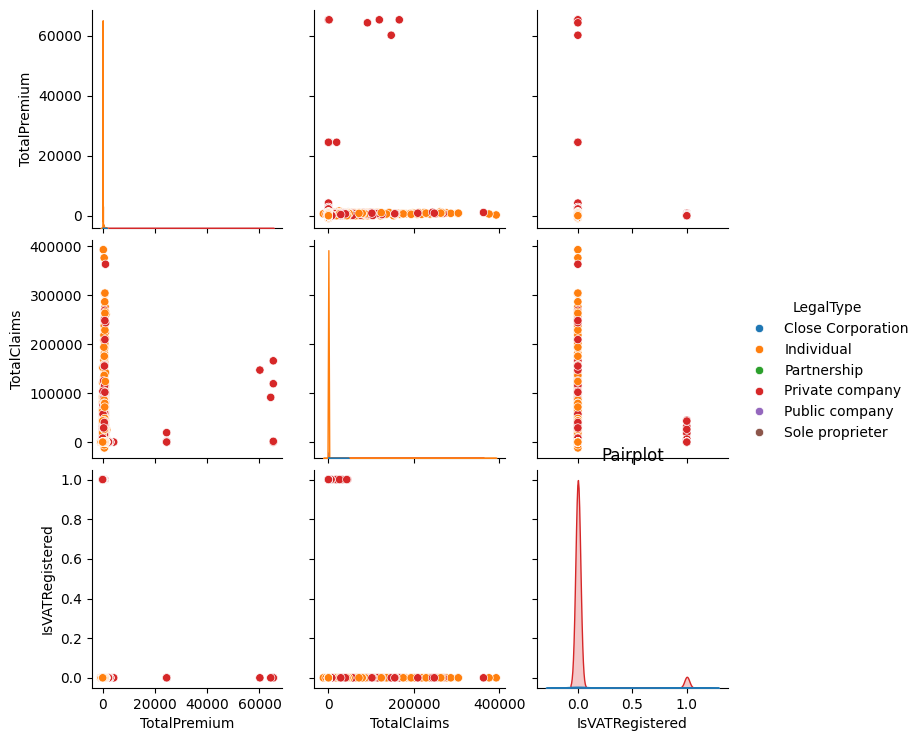

In [14]:
sns.pairplot(
    data[["TotalPremium", "TotalClaims", "IsVATRegistered", "LegalType"]],
    hue="LegalType",
)
plt.title("Pairplot")
plt.show()

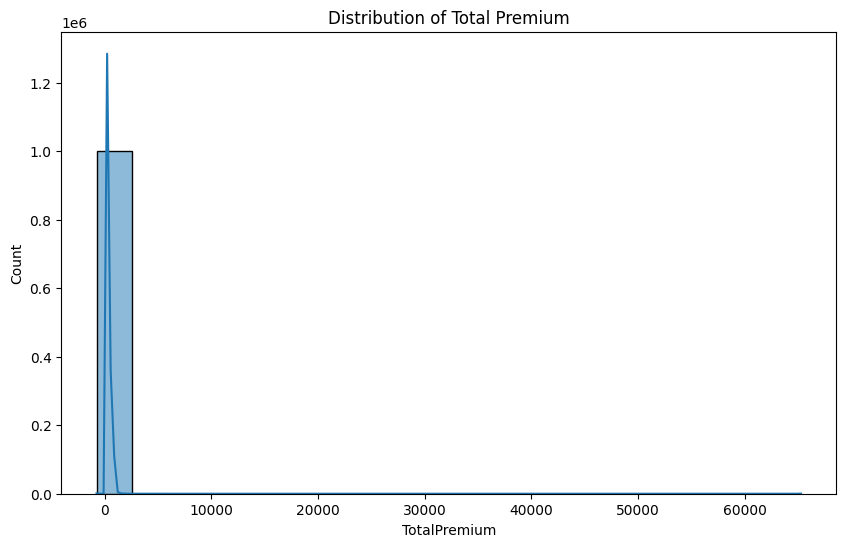

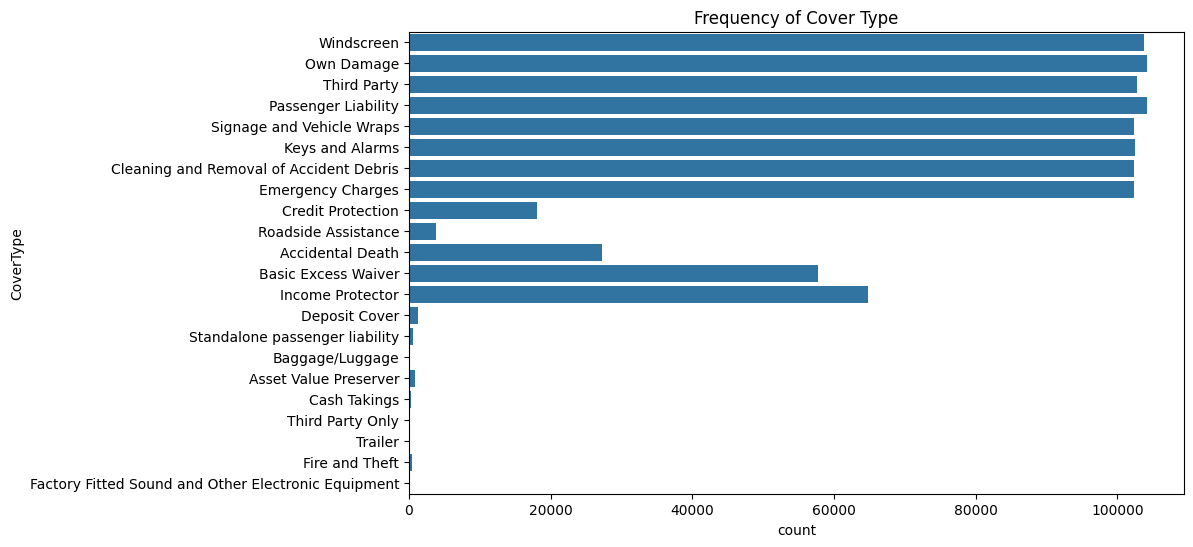

In [16]:
def univariate_analysis(data):
    # Plot histograms for numerical columns
    plt.figure(figsize=(10, 6))
    sns.histplot(data['TotalPremium'], bins=20, kde=True)
    plt.title('Distribution of Total Premium')
    plt.show()

    # Create bar charts for categorical columns
    plt.figure(figsize=(10, 6))
    sns.countplot(data['CoverType'])
    plt.title('Frequency of Cover Type')
    plt.show()
    
univariate_analysis(data)

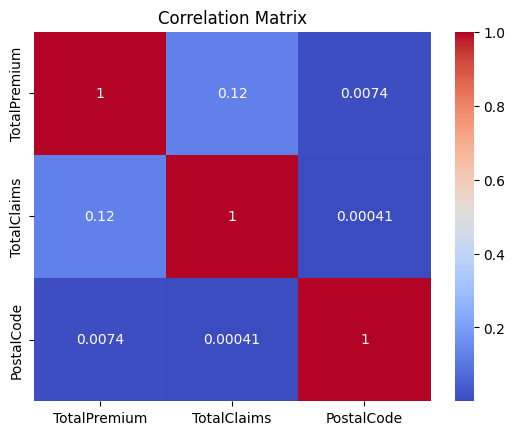

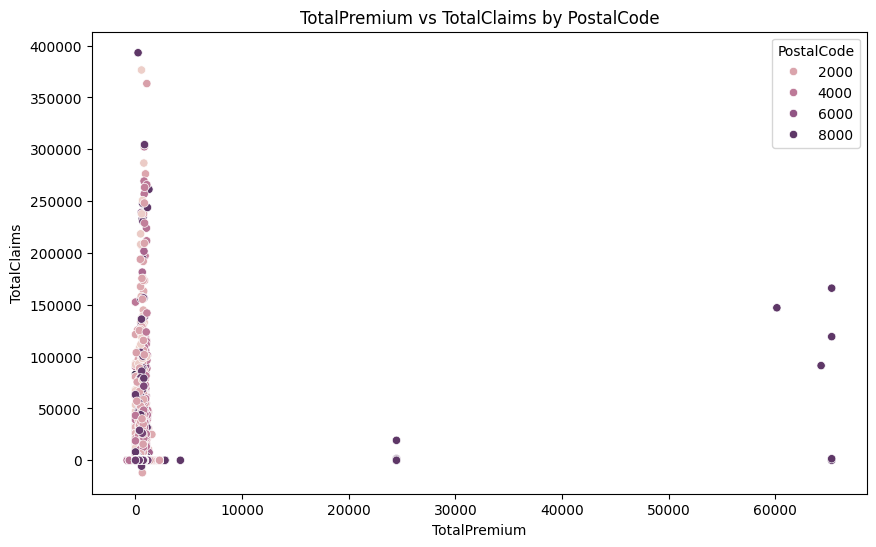

In [20]:
def bivariate_multivariate_analysis(data):
    # Explore correlations and associations between variables
    corr_matrix = data[['TotalPremium', 'TotalClaims', 'PostalCode']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    # Scatter plot for TotalPremium vs TotalClaims based on mmcode
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=data)
    plt.title('TotalPremium vs TotalClaims by PostalCode')
    plt.show()

bivariate_multivariate_analysis(data)

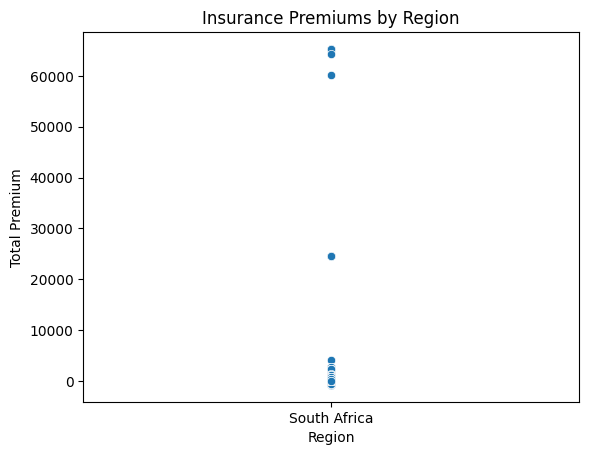

In [21]:
def plot_premium_vs_region(data):
    """
    Create a scatter plot to compare insurance premiums by region.
    Args:
        data (pd.DataFrame): Input data containing 'TotalPremium' and 'Country'.
    """
    sns.scatterplot(data=data, x='Country', y='TotalPremium')
    plt.xlabel('Region')
    plt.ylabel('Total Premium')
    plt.title('Insurance Premiums by Region')
    plt.show()
plot_premium_vs_region(data)

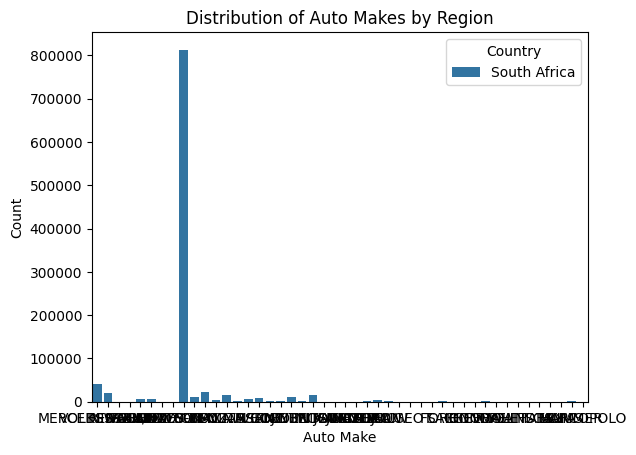

In [22]:
def plot_auto_make_distribution(data):
    """
    Create a bar chart to show the distribution of auto makes by region.
    Args:
        data (pd.DataFrame): Input data containing 'make' and 'Country'.
    """
    sns.countplot(data=data, x='make', hue='Country')
    plt.xlabel('Auto Make')
    plt.ylabel('Count')
    plt.title('Distribution of Auto Makes by Region')
    plt.show()
plot_auto_make_distribution(data)

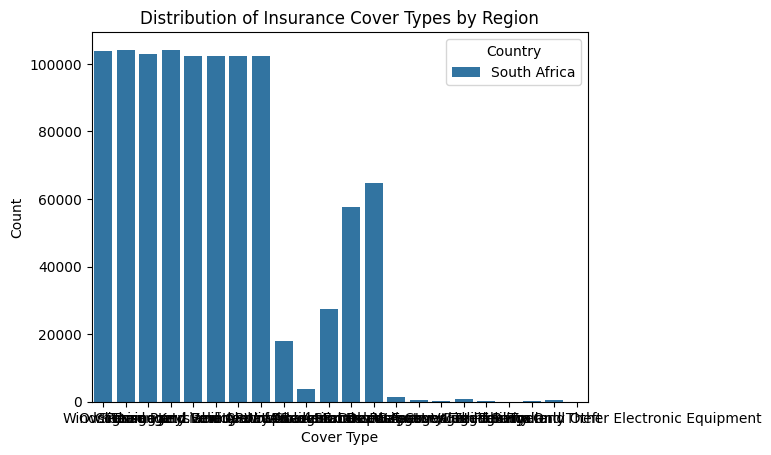

In [23]:
def plot_cover_type_distribution(data):
    """
    Create a bar chart to show the distribution of insurance cover types by region.
    Args:
        data (pd.DataFrame): Input data containing 'CoverType' and 'Country'.
    """
    sns.countplot(data=data, x='CoverType', hue='Country')
    plt.xlabel('Cover Type')
    plt.ylabel('Count')
    plt.title('Distribution of Insurance Cover Types by Region')
    plt.show()
plot_cover_type_distribution(data)

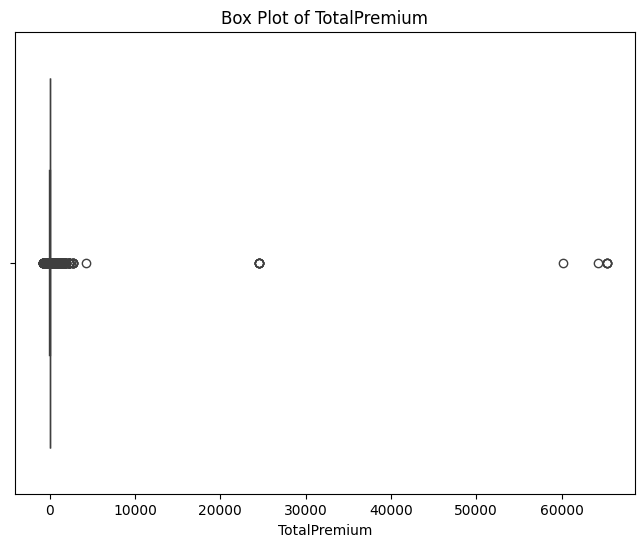

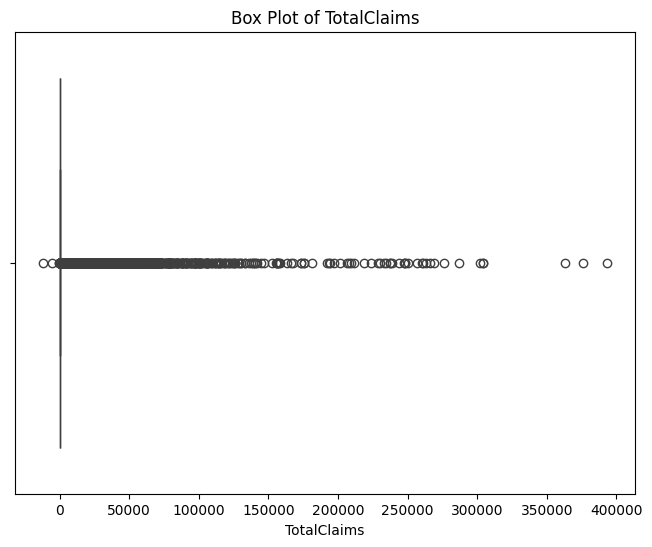

In [24]:

def plot_boxplot(data, column_name):
    """
    Create a box plot for a numerical column.
    Args:
        data (pd.DataFrame): Input data.
        column_name (str): Name of the column.
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column_name])
    plt.title(f'Box Plot of {column_name}')
    plt.xlabel(column_name)
    plt.show()
plot_boxplot(data, 'TotalPremium')
plot_boxplot(data, 'TotalClaims')

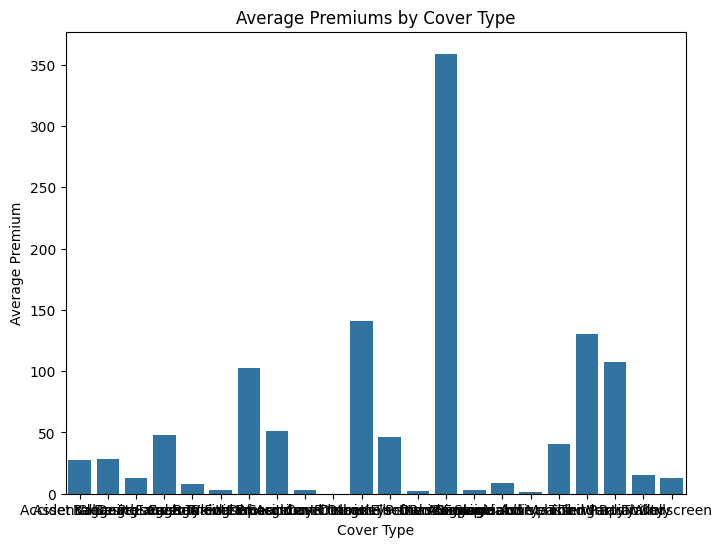

In [25]:
def plot_avg_premium_by_cover(data):
    """
    Create a bar chart to compare average premiums by insurance cover type.
    Args:
        data (pd.DataFrame): Input data.
    """
    avg_premium_by_cover = data.groupby('CoverType')['TotalPremium'].mean()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=avg_premium_by_cover.index, y=avg_premium_by_cover.values)
    plt.xlabel('Cover Type')
    plt.ylabel('Average Premium')
    plt.title('Average Premiums by Cover Type')
    plt.show()
plot_avg_premium_by_cover(data)

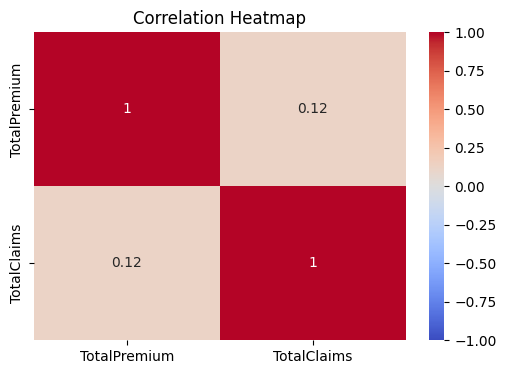

In [26]:
def plot_correlation_heatmap(data):
    """
    Create a heatmap to visualize the correlation between TotalPremium and TotalClaims.
    Args:
        data (pd.DataFrame): Input data.
    """
    correlation_matrix = data[['TotalPremium', 'TotalClaims']].corr()
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()
plot_correlation_heatmap(data)

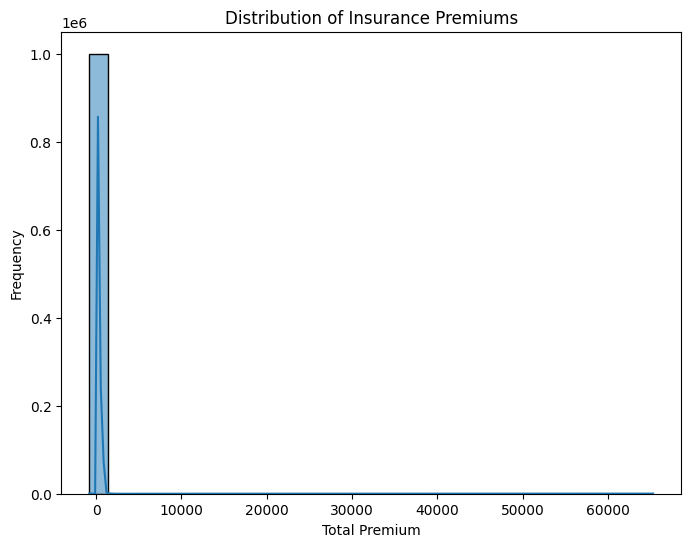

In [27]:

def plot_premium_distribution(data):
    """
    Create a histogram to visualize the distribution of insurance premiums.
    Args:
        data (pd.DataFrame): Input data.
    """
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x='TotalPremium', bins=30, kde=True)
    plt.xlabel('Total Premium')
    plt.ylabel('Frequency')
    plt.title('Distribution of Insurance Premiums')
    plt.show()
plot_premium_distribution(data)